In [69]:
#导入必要的包
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from scipy.io import loadmat
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

In [70]:
#数据处理
data = loadmat('data1.mat')# 调用loadmat加载数据集data1.mat
X = data['X']#前两列为特征
Y = data['y']#最后一列为目标值     
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,train_size=0.7,random_state=1)#划分数据集 7：3的比例
# print(x_train)
# print(y_train)

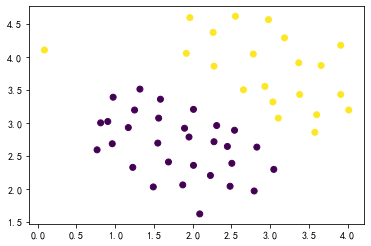

In [71]:
# 可视化数据集
plt.scatter(X[:,0],X[:,1],c=Y)

In [88]:
# 模型的建立 调用模型
Linearmodel = LinearSVC(C=1000)  # 使用 LinearSVC类,线性核函数
Linearmodel.fit(X_train, y_train)  # 用样本集 训练 SVM 模型

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC(C=1000)

分类准确度：0.9375


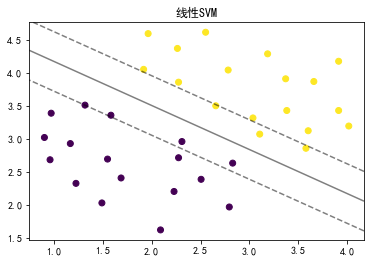

In [89]:
# 绘制图像 制作网格
# 散点图，根据y值设置不同颜色
plt.scatter(X_train[:,0], X_train[:,1], c=y_train) 
# 获得子图
ax = plt.gca()
# 获取横纵坐标最大值
xlim = ax.get_xlim()
ylim = ax.get_ylim()
#在最大值与最小值之间形成30个规律的数据
xx = np.linspace(xlim[0], xlim[1], 30) 
yy = np.linspace(ylim[0], ylim[1], 30) 
#使用这里形成的二维数组作为我们contour函数中的X和Y
#使用meshgrid函数将两个一维向量转换为特征矩阵
#核心是将两个特征向量广播，以便获取y .shape * x.shape这么多个坐标点的横坐标和纵坐标
YY, XX = np.meshgrid(yy, xx)
#其中ravel ( )是降维函数，vstack能够将多个结构一致的一维数组按行堆叠起来
#xy就是已经形成的网格，它是遍布在整个画布上的密集的点
xy = np.vstack([XX.ravel(), YY.ravel()]).T
#重要接口decision_function，返回每个输入的样本所对应的到决策边界的距离
#然后再将这个距离转换为axisx的结构，这是由于画图的函数contour要求Z的结构必须与X和Y一致
Z = Linearmodel.decision_function(xy).reshape(XX.shape)
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])  # 绘制决策边界和margin
plt.rcParams['font.sans-serif'] = 'SimHei'
plt.title("线性SVM")
print('分类准确度：{:.4f}'.format(Linearmodel.score(X_test, y_test))) #准确度

In [216]:
data2=loadmat('data2.mat')
X = data2['X']
# print(X)
Y = data2['y']
# print(Y)
x_train2,x_test2,y_train2,y_test2 = train_test_split(X,Y,test_size=0.3,train_size=0.7,random_state=1)
# print(x_train)
# print(y_train)

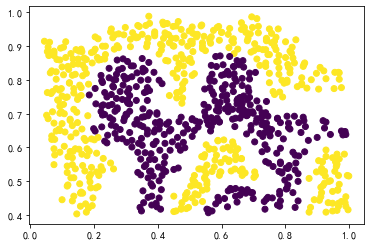

In [217]:
plt.scatter(X[:,0],X[:,1],c=Y.flatten())

In [218]:
# #定义模型
# model = SVC(kernel='rbf', C=1000)

In [219]:
# # 绘制图像
# # 定义绘制SVM边界方法
# def plot_svm_boundary(model,X,y):
    
#     X = X.values
#     y = y.values
    
#     # Scatter Plot
#     plt.scatter(X[:, 0], X[:, 1], c=y, s=30,cmap='coolwarm')

    
#     # plot the decision function
#     ax = plt.gca()
#     xlim = ax.get_xlim()
#     ylim = ax.get_ylim()

#     # create grid to evaluate model
#     xx = np.linspace(xlim[0], xlim[1], 30)
#     yy = np.linspace(ylim[0], ylim[1], 30)
#     YY, XX = np.meshgrid(yy, xx)
#     xy = np.vstack([XX.ravel(), YY.ravel()]).T
#     Z = model.decision_function(xy).reshape(XX.shape)

#     # plot decision boundary and margins
#     ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
#                linestyles=['--', '-', '--'])
#     # plot support vectors
#     ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
#                linewidth=1, facecolors='none', edgecolors='k')
#     plt.show()
# plot_svm_boundary(model,x_train2,y_train2)

分类准确度：0.9537


D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


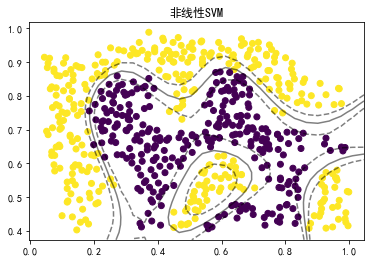

In [152]:
modelSVM = SVC(C=100, kernel='rbf', degree=3,gamma=10)  # SVC 建模：使用 SVC类，线性核函数
# modelSVM = LinearSVC(C=100)  # SVC 建模：使用 LinearSVC类，运行结果同上
modelSVM.fit(x_train2, y_train2)  # 用样本集 X,y 训练 SVM 模型

# print("\nSVM model: Y = w0 + w1*x1 + w2*x2") # 分类超平面模型
# print('截距: w0={}'.format(modelSVM.intercept_))  # w0: 截距, YouCans
# print('系数: w1={}'.format(modelSVM.coef_))  # w1,w2: 系数, XUPT
print('分类准确度：{:.4f}'.format(modelSVM.score(x_test2, y_test2)))  # 对训练集的分类准确度

# 绘制分割超平面和样本集分类结果
plt.scatter(x_train2[:,0], x_train2[:,1], c=y_train2.flatten())  # 散点图，根据 y值设置不同颜色
ax = plt.gca()  # 移动坐标轴
xlim = ax.get_xlim()  # 获得Axes的 x坐标范围
ylim = ax.get_ylim()  # 获得Axes的 y坐标范围
xx = np.linspace(xlim[0], xlim[1], 30)  # 创建等差数列，从 start 到 stop，共 num 个
yy = np.linspace(ylim[0], ylim[1], 30)  #
YY, XX = np.meshgrid(yy, xx)  # 生成网格点坐标矩阵 XUPT
xy = np.vstack([XX.ravel(), YY.ravel()]).T  # 将网格矩阵展平后重构为数组
Z = modelSVM.decision_function(xy).reshape(XX.shape)
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])  # 绘制决策边界和分隔
#ax.scatter(modelSVM.support_vectors_[:, 0], modelSVM.support_vectors_[:, 1], s=100,
#            linewidth=1, facecolors='none', edgecolors='k')  # 绘制 支持向量
plt.rcParams['font.sans-serif'] = 'SimHei'
plt.title("非线性SVM")
plt.show()

In [124]:
kernel = ["linear","poly", "rbf", "sigmoid"]
for kernel in kernel:
    clf = SVC(kernel=kernel,
              C=1000,
              gamma="auto",
              degree=3,
              cache_size=5000).fit(x_train, y_train)
    print("The accuracy under kernel %s is %f" % (kernel, clf.score(x_test, y_test)))

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


The accuracy under kernel linear is 0.548263
The accuracy under kernel poly is 0.718147
The accuracy under kernel rbf is 0.818533
The accuracy under kernel sigmoid is 0.378378


D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [98]:
# #网格搜索
# from sklearn.model_selection import GridSearchCV

# #定义参数
# params = {
#     'kernel': ('linear','rbg','poly'),
#     'C':[0.01,0.1,0.5,1,2,10,100]
# }

# #拟合模型
# model = GridSearchCV(modelSVM,params,cv=10)
# model.fit(x_train,y_train)

# #查看结果
# print(model.best_params_)
# print(model.best_score_)

In [2]:
data3=loadmat('data3.mat')
# data33 = []
# for k in data3.items():
#     data33.append(k)
# data333 = np.array(data33)
X = data3['X']
Y = data3['y']
x_train3,x_test3,y_train3,y_test3 = train_test_split(X,Y,test_size=0.3,train_size=0.7,random_state=1)

NameError: name 'loadmat' is not defined

分类准确度：0.8906


D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


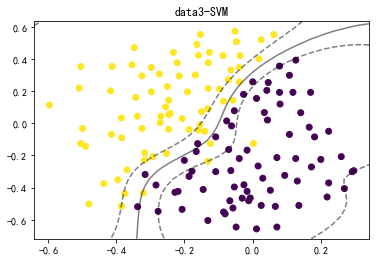

In [227]:
clf = SVC(C=10, kernel='rbf', degree=3) 
clf.fit(x_train3, y_train3)
print('分类准确度：{:.4f}'.format(clf.score(x_test3,y_test3)))

plt.scatter(x_train3[:,0], x_train3[:,1], c=y_train3.flatten())
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30) 
YY, XX = np.meshgrid(yy, xx)#代表的是将x中每一个数据和y中每一个数据组合生成很多点,然后将这些点的x坐标放入到X中,y坐标放入Y中,并且相应位置是对应的
xy = np.vstack([XX.ravel(), YY.ravel()]).T #竖直方向上堆叠
Z = clf.decision_function(xy).reshape(XX.shape)
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
plt.rcParams['font.sans-serif'] = 'SimHei'
plt.title("data3-SVM")
plt.rcParams['axes.unicode_minus'] = False
plt.show()

In [159]:
kernel = ["linear","poly", "rbf", "sigmoid"]
for kernel in kernel:
    clf = SVC(kernel=kernel,
              C=1000,
              gamma="auto",
              degree=3,
              cache_size=5000).fit(x_train3, y_train3)
    print("The accuracy under kernel %s is %f" % (kernel, clf.score(x_test, y_test)))

The accuracy under kernel linear is 0.875000
The accuracy under kernel poly is 0.843750
The accuracy under kernel rbf is 0.875000
The accuracy under kernel sigmoid is 0.859375


D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [3]:
from mpl_toolkits import mplot3d
def plot_3D(elev=30,azim=30,X=x_train3, y=y_train3):
    ax = plt.subplot(projection="3d")
    ax.scatter3D(XI:,0],X[:,1],r,c=y,s=50, cmap='rainbow ')ax.view_init(elev=elev,azim=azim)
    ax.set_xlabel( "x")
    ax.set_ylabel( "y")ax.set_zlabel("r")plt.show( )
plot_3D()

SyntaxError: invalid syntax (<ipython-input-3-f02da5e5a824>, line 4)